# PCA

## Import packages

In [1]:
cd ..

/home/jovyan/Capstone/Github_my_version


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, FastICA
from lib.plr import PLR, connect_line
import scipy.linalg as sla
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

In [3]:
def initialize_2d_plot(x_min=-1, x_max=8, y_min=-1, y_max=8, figsize=(6,6)):
    """Default values: x_min=-1, x_max=8, y_min=-1, y_max=8"""
    fig = plt.figure(figsize=figsize)
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
def draw_vector(np_array, tail=np.array([0,0]), kwargs=None):
    """Pass a vector of dimension 2 and a figure.
       Optionally, specify a start point. Defaults to the origin.
       """
    u_1 = np_array[0]
    u_2 = np_array[1]
    tail_1 = tail[0]
    tail_2 = tail[1]
    if kwargs:
        plt.arrow(tail_1,tail_2,u_1,u_2, **kwargs, head_width=0.25, head_length=0.25)
    else:
        plt.arrow(tail_1,tail_2,u_1,u_2, head_width=0.25, head_length=0.25)    

In [4]:
def load_data(csv):
    df = pd.read_csv('data/sandp500/individual_stocks_15yr_TECHNICALS/' + csv)
    df = df.tail(3526)
    df = df.dropna(how = 'all', axis = 1)
    try:
        df = df.drop("Acc/Dist_ROC_1" , axis = 1)
    except:
        pass
    try:
        df = df.drop("Acc/Dist_ROC_5" , axis = 1)
    except:
        pass
    try:
        df = df.drop("Acc/Dist_ROC_21" , axis = 1)
    except:
        pass
    try:
        df = df.drop("Acc/Dist_ROC_63" , axis = 1)
    except:
        pass
    try:
        df = df.drop("Acc/Dist_ROC_125" , axis = 1)
    except:
        pass
    try:
        df = df.drop("Acc/Dist_ROC_250" , axis = 1)
    except:
        pass
    try:
        drop_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'Name',
                'Open', 'High', 'Low', 'Volume', 'Ex-Dividend', 'Split_Ratio',
                 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume']
        df = df.drop(drop_cols, 1)
    except:
        pass
    
    df = df.dropna(how = 'any', axis = 1)
    df = df.set_index('Date')
    df.to_csv('data/sandp500/individual_stocks_15yr_TECHNICALS/' + csv)

In [5]:
def train_test(csv):
    df = pd.read_csv('data/sandp500/individual_stocks_15yr_buy_or_sell/' + csv)
    df = df.drop('Unnamed: 0', 1)
    df = df.set_index('Date')
    df_train = df[:2645]
    df_test = df[2645:]
    return df_train, df_test

## Load and clean data

In [6]:
individuals = os.listdir(path = "data/sandp500/individual_stocks_15yr_TECHNICALS/")
for csv in individuals:
    load_data(csv)

In [11]:
apple_train, apple_test = train_test('AAPL_data.csv')
msft_train, msft_test = train_test('MSFT_data.csv')
amzn_train, amzn_test = train_test('AMZN_data.csv')

In [14]:
msft_aapl_vertical_train = apple_train.append(msft_train, ignore_index=True)
msft_aapl_vertical_train = msft_aapl_vertical_train.append(amzn_train, ignore_index=True)
msft_aapl_vertical_train = msft_aapl_vertical_train.dropna(how = 'any', axis = 1)
msft_aapl_vertical_train.shape

(7935, 97)

In [16]:
msft_aapl_vertical_train.to_csv('data/combined_vertical_train')
apple_test.to_csv('data/aapl_test')
msft_test.to_csv('data/msft_test')
amzn_test.to_csv('data/amzn_test')

In [109]:
y_train = msft_aapl_vertical_train['targets']
X_train = msft_aapl_vertical_train.drop('targets', 1)

y_test = msft_aapl_vertical_test['targets']
X_test = msft_aapl_vertical_test.drop('targets', 1)

In [110]:
X = X_train.as_matrix()

## Determine number of components for PCA

In [111]:
pca = PCA()
X_sc = StandardScaler().fit_transform(X)
pca.fit(X_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

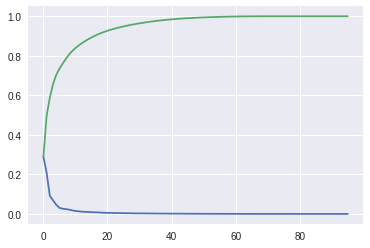

In [112]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_exp_var = np.cumsum(explained_var_ratio)
plt.plot(explained_var_ratio)
plt.plot(cumulative_exp_var)

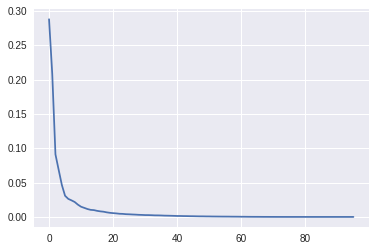

In [113]:
plt.plot(explained_var_ratio)

## Perform PCA

In [114]:
X_sc.shape

(7935, 96)

In [115]:
pca = PCA(n_components = 25, svd_solver = 'randomized', random_state = 42, iterated_power = 10000)
projected = pca.fit_transform(X_sc)
print(X_sc.shape)
print(projected.shape)

(7935, 96)
(7935, 25)


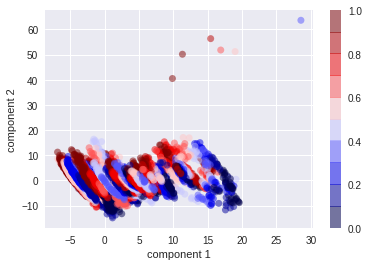

In [116]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

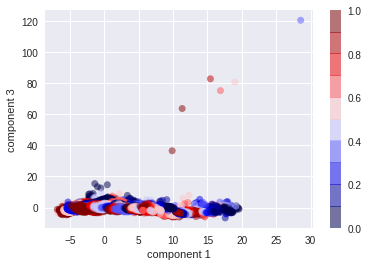

In [117]:
plt.scatter(projected[:, 0], projected[:, 2],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar();

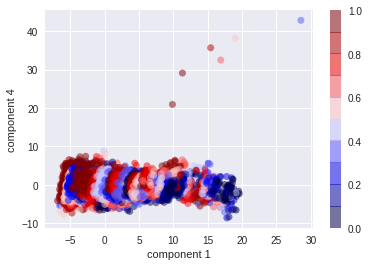

In [118]:
plt.scatter(projected[:, 0], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 4')
plt.colorbar();

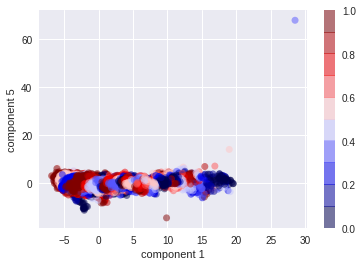

In [119]:
plt.scatter(projected[:, 0], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 5')
plt.colorbar();

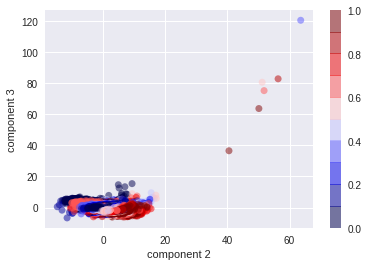

In [120]:
plt.scatter(projected[:, 1], projected[:, 2],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

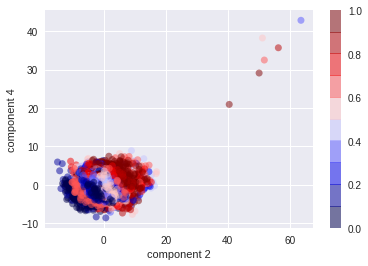

In [121]:
plt.scatter(projected[:, 1], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 4')
plt.colorbar();

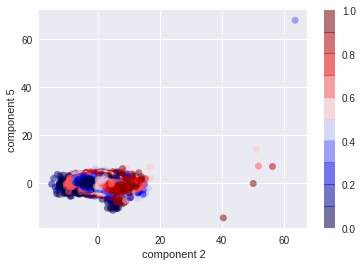

In [122]:
plt.scatter(projected[:, 1], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 5')
plt.colorbar();

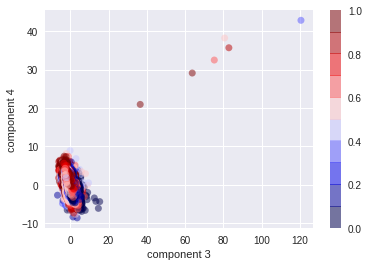

In [123]:
plt.scatter(projected[:, 2], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.colorbar();

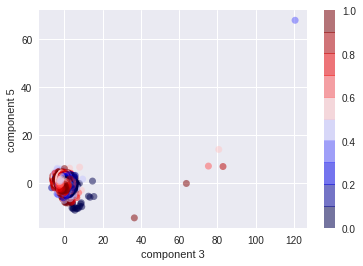

In [124]:
plt.scatter(projected[:, 2], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 3')
plt.ylabel('component 5')
plt.colorbar();

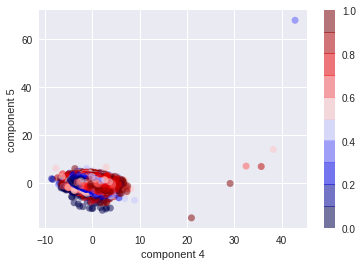

In [125]:
plt.scatter(projected[:, 3], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 4')
plt.ylabel('component 5')
plt.colorbar();

## Kernel PCA

In [126]:
kpca = KernelPCA(random_state = 42,
                       gamma = 0.25,
                       kernel = 'rbf',
                       n_components = 5,
                       eigen_solver = 'arpack')
projected = kpca.fit_transform(X_sc)
print(X_sc.shape)
print(projected.shape)

(7935, 96)
(7935, 5)


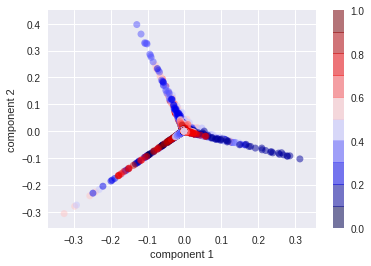

In [127]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

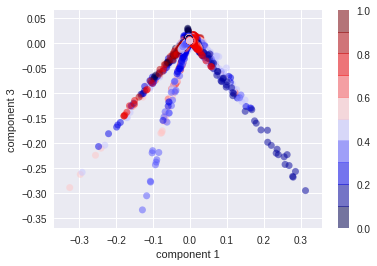

In [128]:
plt.scatter(projected[:, 0], projected[:, 2],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar();

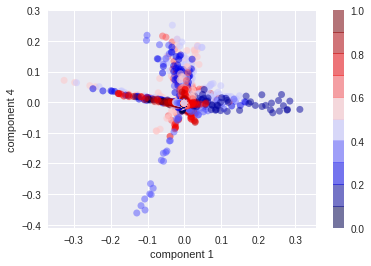

In [129]:
plt.scatter(projected[:, 0], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 4')
plt.colorbar();

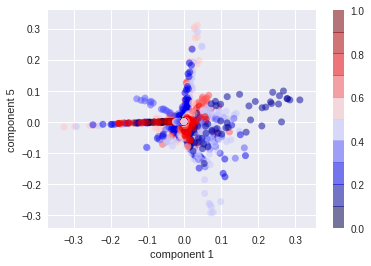

In [130]:
plt.scatter(projected[:, 0], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 5')
plt.colorbar();

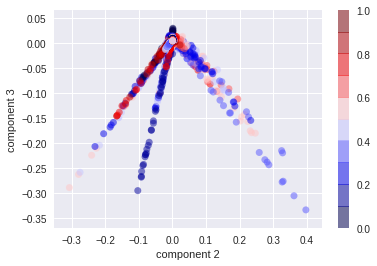

In [131]:
plt.scatter(projected[:, 1], projected[:, 2],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

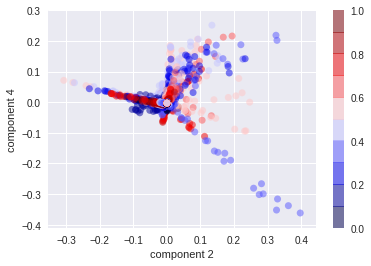

In [132]:
plt.scatter(projected[:, 1], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 4')
plt.colorbar();

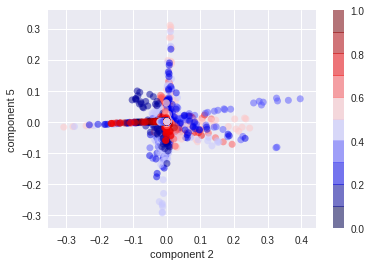

In [133]:
plt.scatter(projected[:, 1], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 5')
plt.colorbar();

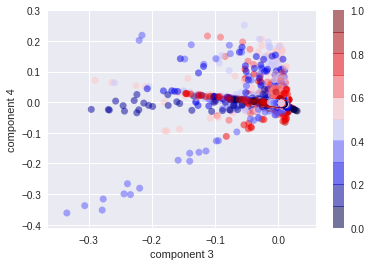

In [134]:
plt.scatter(projected[:, 2], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.colorbar();

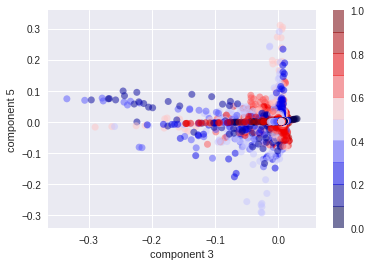

In [135]:
plt.scatter(projected[:, 2], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 3')
plt.ylabel('component 5')
plt.colorbar();

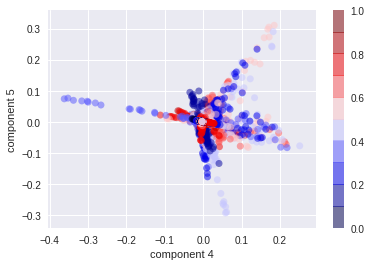

In [136]:
plt.scatter(projected[:, 3], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 4')
plt.ylabel('component 5')
plt.colorbar();

## Fast ICA

In [137]:
ica = FastICA(n_components = 5, algorithm = 'deflation', whiten = True, fun = 'cube', random_state = 42)
projected = ica.fit_transform(X_sc)
print(X_sc.shape)
print(projected.shape)

(7935, 96)
(7935, 5)


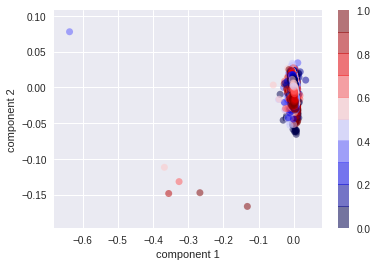

In [138]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

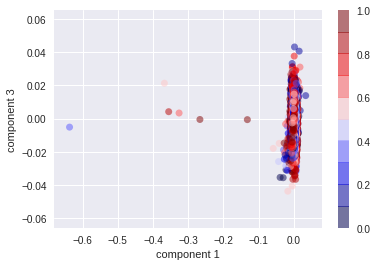

In [139]:
plt.scatter(projected[:, 0], projected[:, 2],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar();

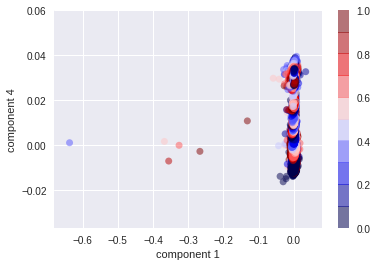

In [140]:
plt.scatter(projected[:, 0], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 4')
plt.colorbar();

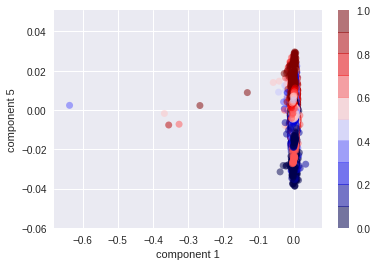

In [141]:
plt.scatter(projected[:, 0], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 5')
plt.colorbar();

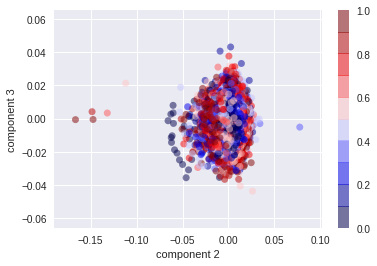

In [142]:
plt.scatter(projected[:, 1], projected[:, 2],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

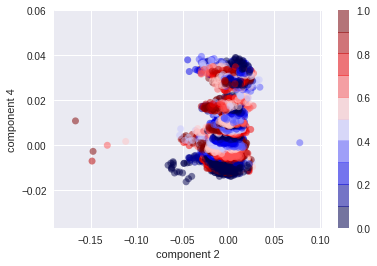

In [143]:
plt.scatter(projected[:, 1], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 4')
plt.colorbar();

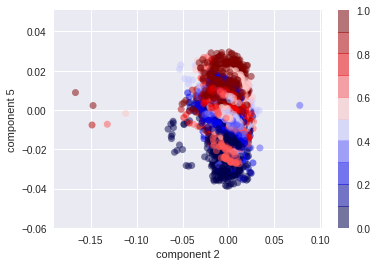

In [144]:
plt.scatter(projected[:, 1], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 2')
plt.ylabel('component 5')
plt.colorbar();

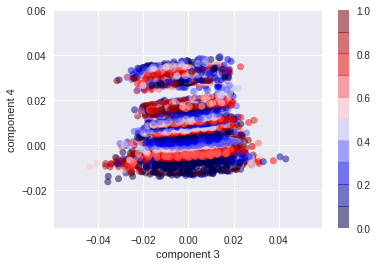

In [145]:
plt.scatter(projected[:, 2], projected[:, 3],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.colorbar();

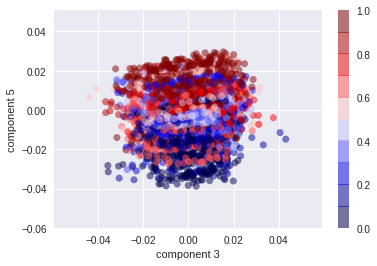

In [146]:
plt.scatter(projected[:, 2], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 3')
plt.ylabel('component 5')
plt.colorbar();

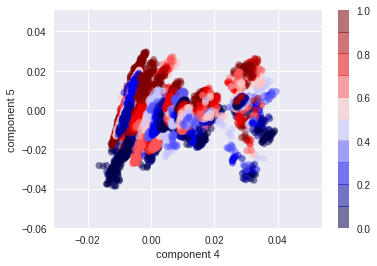

In [147]:
plt.scatter(projected[:, 3], projected[:, 4],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 4')
plt.ylabel('component 5')
plt.colorbar();